# Instalação
Importação das bibliotecas para funcionamento da Lógica Fuzzy.
Biblioteca utilizada: SciKit-fuzzy
## Instalação direta no python
pip3 install -U scikit-fuzzy
## Instalação via conda
conda install -c conda-forge scikit-fuzzy

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Implementação do olá mundo do fuzzy: cálculo da gorjeta.
Montagem das variáveis fuzzy: antecedente e consequente de acordo com o contexto.


In [2]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'serviço')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

qualidade.automf(3)
servico.automf(3)

In [3]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 13, 25])
gorjeta['alta']  = fuzz.trimf(gorjeta.universe, [13, 25, 25])


In [5]:
regra1 = ctrl.Rule(qualidade['poor'] | servico['poor'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['average'], gorjeta['media'])
regra3 = ctrl.Rule(servico['good'] | qualidade['good'], gorjeta['alta'])
regra4 = ctrl.Rule(servico['poor'] & qualidade['good'], gorjeta['media'])

In [6]:
gorjetando_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4])

In [7]:
gorjetando = ctrl.ControlSystemSimulation(gorjetando_controle)

In [8]:
gorjetando.input['qualidade'] = 6.5
gorjetando.input['serviço'] = 9.8

In [9]:
gorjetando.compute()

In [10]:
print(gorjetando.output['gorjeta'])

19.847607361963192


/usr/lib64/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


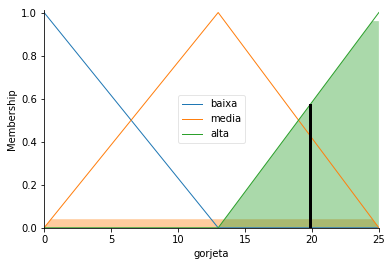

In [11]:
gorjeta.view(sim=gorjetando)

/usr/lib64/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


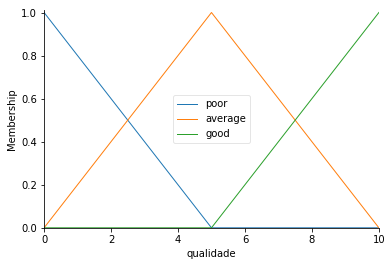

In [12]:
qualidade.view()

/usr/lib64/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


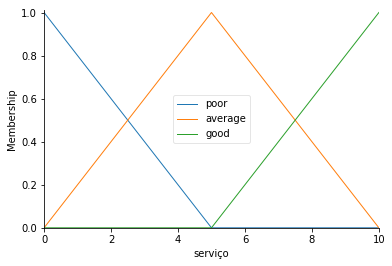

In [13]:
servico.view()

/usr/lib64/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


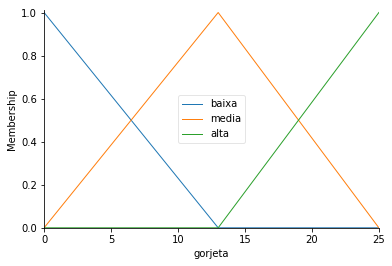

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4a1016e470>)

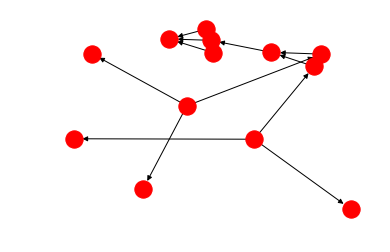

In [16]:
regra1.view()